# Identifying trends in modern Greenland temperatures using ice cores
_A final project for Stable Isotope Geochemistry_

By: George Lu and Sam Chester

## 1. Introduction
The goal of this project is to process and interpret near-present d18o data from various ice cores taken from Greenland. BACKGROUND ON ICE CORES IN GREENLAND. 

We are approaching our investigation from a novice's perspective. First, we look at trends between cores to identify any spatiotemporal relationships. Next, we compare the ice-core data with historical temperature observations from coastal Greenland to further establish if there's any identifiable spatiotemporal trends. Finally, we attempt to use some temperature relationships to make temperature predictions using the ice core data. 

The project is formatted as a Jupyter Notebook. It includes blocks of code which conduct our analysis and generates figures. Before we continue to the next section, we need to import some relevant Python libraries for our analysis. The comment at the top of each code cell describes the action done by the cell, and any outputs from the code will appear below the cell. 

In [53]:
# Import libraries
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import glob
import os
from sklearn import datasets, linear_model
from sklearn.metrics import r2_score

import cartopy as crt
import cartopy.crs as ccrs


## 2. Data
### 2.1 Ice Cores
The following section and its subsections describe all the ice core data we use. Each core-specific subsection describes when the core was acquired, the location of each drilling site, and what initial findings were made with the core. Accompanied with each paragraph is a plot of the core's d18o values.

In [123]:
# Define a plotting function for core timeseries
def plot_cores(core_list):
    fig, ax = plt.subplots(figsize=(4,2))
    for core in core_list:
        core.plot(ax=ax)
    return fig, ax


#### 2.1.1 Camp Century
TEXT

(<Figure size 800x400 with 1 Axes>, <AxesSubplot:xlabel='year'>)

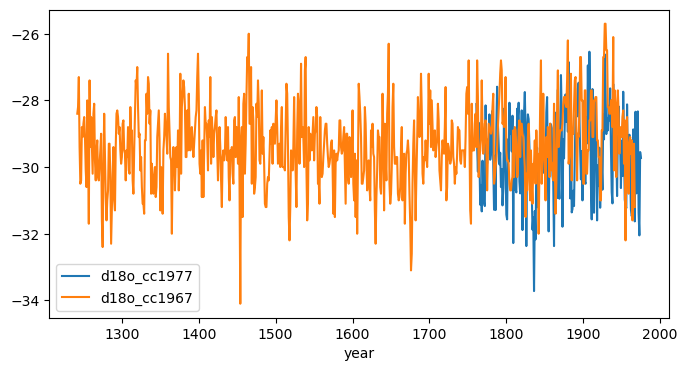

In [3]:
# Load Camp century core data and plot
cc_1977 = pd.read_csv("data/campcentury/del1977.txt", sep="	",skiprows=74, names=["year", "d18o_cc1977"],dtype='float')
cc_1977 = cc_1977.set_index('year')
cc_1977_latlonelev = (77.167,-61.133,1885)

# longer series past 1700s
cc_1967 = pd.read_csv("data/campcentury/cc-1ynew.txt", sep="	",skiprows=75, names=["year", "d18o_cc1967"],dtype='float')
cc_1967 = cc_1967.set_index('year')
cc_1967_latlonelev = (77.167,-61.133,1885)

plot_cores([cc_1977,cc_1967])

#### 2.1.2 Dye 2
TEXT

(<Figure size 800x400 with 1 Axes>, <AxesSubplot:xlabel='year'>)

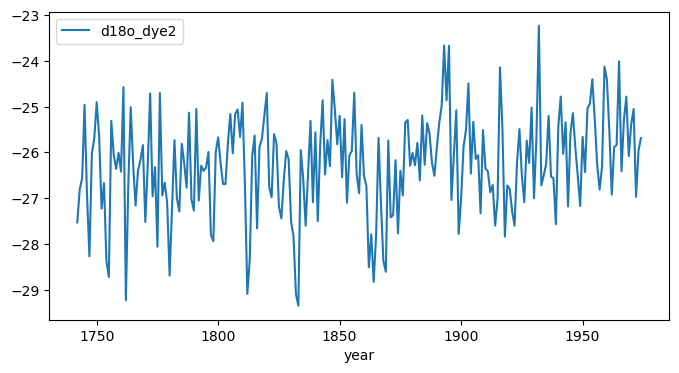

In [4]:
# Load Dye 2 data and plot
dye2 = pd.read_csv("data/dye2/dye2.csv",names=["year", "d18o_dye2"],dtype='float')[:-1]
dye2 = dye2.set_index('year')
dye2_latlonelev = (66.38,-46.18,2332)

plot_cores([dye2])

#### 2.1.3 Dye 3
TEXT

(<Figure size 800x400 with 1 Axes>, <AxesSubplot:xlabel='year'>)

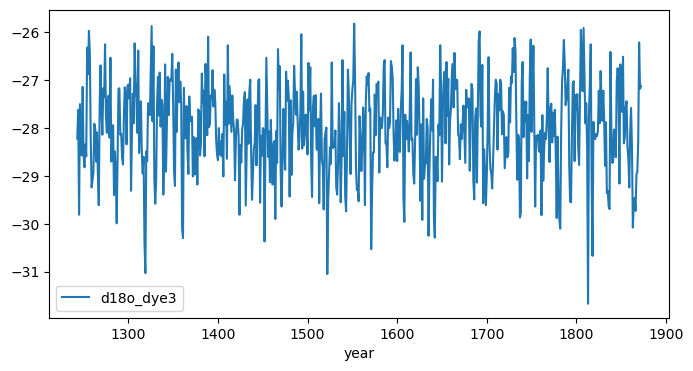

In [5]:
# Load Dye 3 data and plot
dye3 = pd.read_csv("data/dye3/dye3-1yr.txt", sep="	",skiprows=17, names=["year", "d18o_dye3"],dtype='float')[:630]
dye3 = dye3.set_index('year')
dye3_latlonelev = (65.18,-42.82,2477)

plot_cores([dye3])

#### 2.1.4 Summit
TEXT

(<Figure size 800x400 with 1 Axes>, <AxesSubplot:xlabel='year'>)

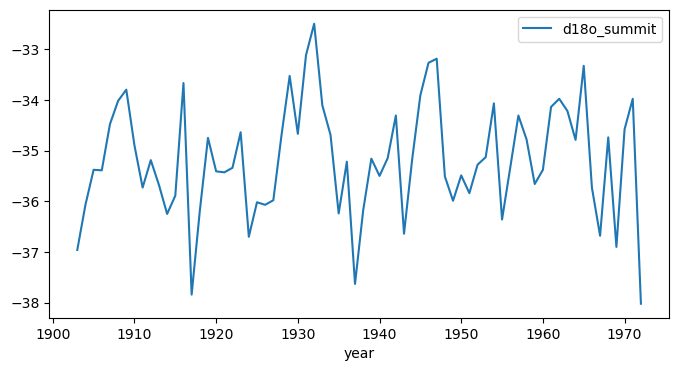

In [6]:
# Load Summit data and plot
summit = pd.read_csv("data/summit/sum74-1y.txt", sep="	",skiprows=79, names=["year", "d18o_summit"],dtype='float')
summit = summit.set_index('year')
summit_latlonelev = (71.28,-37.93,3200)

plot_cores([summit])

#### 2.1.4 NEEM
TEXT

(<Figure size 800x400 with 1 Axes>, <AxesSubplot:xlabel='year'>)

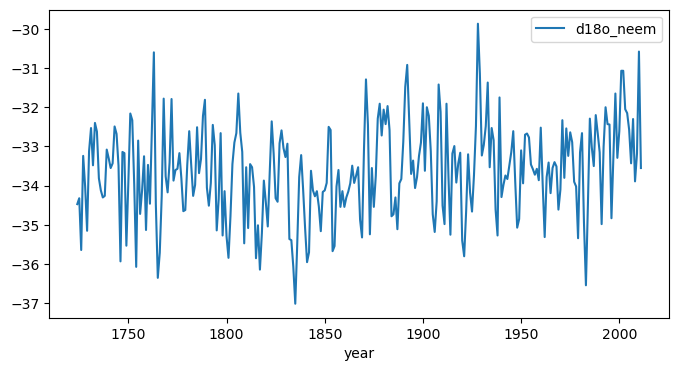

In [7]:
# Load NEEM data and plot
neem = pd.read_csv("data/neem/NEEM.csv",dtype='float').rename(columns={'d18o':'d18o_neem'})
neem = neem.set_index('year')
neem_latlonelev = (77.45,-51.06,2450)

plot_cores([neem])

#### 2.1.5 Renland
TEXT

(<Figure size 800x400 with 1 Axes>, <AxesSubplot:xlabel='year'>)

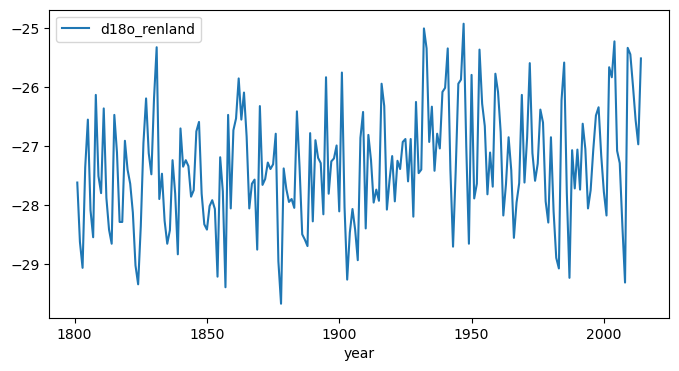

In [8]:
# Load Renland data and plot
renland = pd.read_csv("data/renland/renland.csv",dtype='float')
renland = renland.set_index('year')
renland_latlonelev = (71.305,-26.723,2331)

plot_cores([renland])

In [9]:
# Compile
all_cores = pd.concat([cc_1977,cc_1967,dye2,dye3,summit,neem,renland],axis=1).sort_index()

site_data = [cc_1977_latlonelev,cc_1977_latlonelev,dye2_latlonelev,dye3_latlonelev,
             summit_latlonelev,neem_latlonelev,renland_latlonelev]
core_info = all_cores.mean().to_frame('mean_d18o')
core_info['mean_sigma'] = all_cores.std()
core_info['lon'] = [site[1] for site in site_data]
core_info['lat'] = [site[0] for site in site_data]
core_info['h'] = [site[2] for site in site_data]

In [113]:
core_info

,mean_d18o,mean_sigma,lon,lat,h
d18o_cc1977,-29.634651,1.284213,-61.133,77.167,1885
d18o_cc1967,-29.333471,1.167465,-61.133,77.167,1885
d18o_dye2,-26.265880,1.087926,-46.180,66.380,2332
d18o_dye3,-28.000968,0.958080,-42.820,65.180,2477
d18o_summit,-35.184286,1.139567,-37.930,71.280,3200
d18o_neem,-33.627639,1.184301,-51.060,77.450,2450
d18o_renland,-27.338411,0.989717,-26.723,71.305,2331


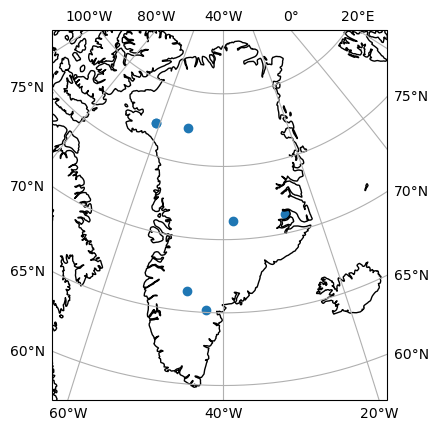

In [35]:
projection = ccrs.PlateCarree()
fig_proj = ccrs.Orthographic(central_latitude=70, central_longitude=-40)
fig, ax = plt.subplots(subplot_kw={'projection': fig_proj})
ax.gridlines(draw_labels=True)
ax.coastlines()
p1 = ax.scatter(core_info.lon,core_info.lat,transform=projection)
ax.set_extent([-62, -19, 57, 84], crs=projection)  

### 2.2 Historic Temperatures
A paragraph describing how the temperature record was taken, and a map of the temperature sites.

(1700.0, 2000.0)

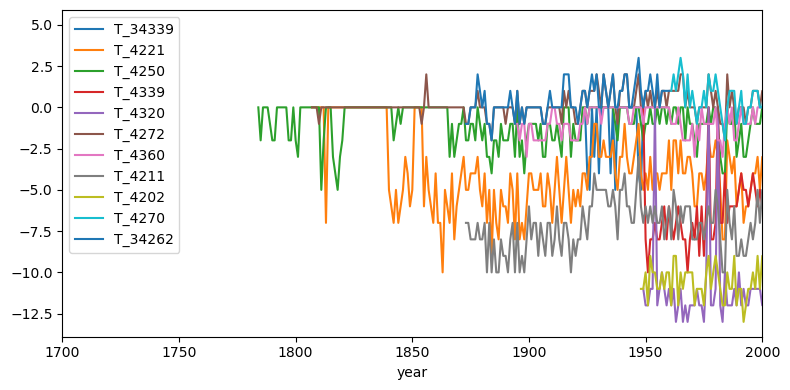

In [219]:
# load temperature data
def load_csv(folder):
    filenames = glob.glob(f"{folder}/*.csv")

    li = []

    for filename in filenames:
        df = pd.read_csv(filename, dtype='float').T
        df = df.rename_axis('year')
        name = filename.split('_')[2]
        df = df.rename(columns={0:f'T_{name}'})
        df.index = df.index.map(int)
        li.append(df)
        
    return pd.concat(li,axis=1).sort_index()
#temp_112 = pd.read_csv("data/temp_data/region_34262_out.csv",dtype='float').T
#temp_112=temp_112.rename_axis('year')
#temp_112 = temp_112.rename(columns={0:'T_112'})
#temp_112.index = temp_112.index.map(int)
test = load_csv('data/temp_data')
fig, ax = plt.subplots(figsize=(8,4),layout='tight')
test.plot(ax=ax)
plt.xlim([1700,2000])

# 3. Identifying spatiotemporal trends in historic core data

The goal of this section is to identify trends within the cores themselves, without comparing them to other datasets. First, we plot all the core data together. We will first look for trends in time across all the cores, before looking at any trends in space.

<AxesSubplot:xlabel='year'>

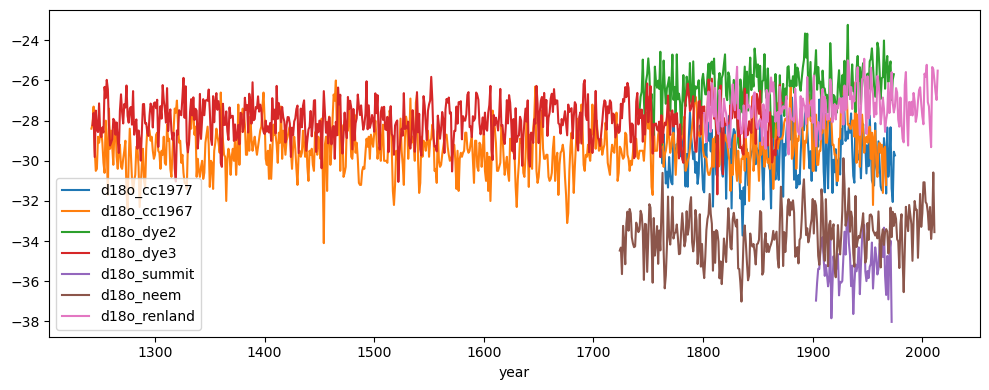

In [110]:
# Plot all cores
fig, ax = plt.subplots(figsize=(10,4),layout='tight')

all_cores.plot(ax=ax)


From the above plot, we see that the interannual variations in d18o values for the cores do not exhibit an obvious pattern between cores. Strangely, even the two Camp Century cores (`d18o_cc1977` and `d18o_cc1967`) do not seem to follow each other by much. Temporally, it looks like the d18o values for the NEEM and Renland cores start to increase at around 1980 or so. It would be interesting to revisit the other core sites and see if they show the same uptick. 

To quantify if there's a pattern or not between the cores, we calculate the Pearson correlation coefficient (r) between each core, done in the next cell.

In [111]:
# Calculate correlations
corr = all_cores.corr()
corr.style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1)

,d18o_cc1977,d18o_cc1967,d18o_dye2,d18o_dye3,d18o_summit,d18o_neem,d18o_renland
d18o_cc1977,1.000000,0.175748,0.170013,0.119309,0.390421,0.482098,0.081906
d18o_cc1967,0.175748,1.000000,0.035251,-0.096778,0.159870,0.232908,0.027767
d18o_dye2,0.170013,0.035251,1.000000,0.253898,0.292971,0.158935,0.126845
d18o_dye3,0.119309,-0.096778,0.253898,1.000000,nan,0.223801,0.242987
d18o_summit,0.390421,0.159870,0.292971,nan,1.000000,0.314320,0.228719
d18o_neem,0.482098,0.232908,0.158935,0.223801,0.314320,1.000000,0.208616
d18o_renland,0.081906,0.027767,0.126845,0.242987,0.228719,0.208616,1.000000


From above, we see that there aren't strong correlations between any of the cores. Even the two Camp Century cores aren't strongly correlated. Consequently, given the usage of different age models and the different locations and elevations of each core, we cannot confidently say that there are any temporal trends on an annual basis across the ice sheet. The core that seems to have the most strong correlations is NEEM, which is most strongly positively correlated with the longer Camp Century core (r=0.48). It is the closest to the Camp Century site, so perhaps there are some more regional trends in time.

Next, we try smoothing the data by taking a decadal rolling average, to see if it can reveal any trends in time. We also zoom into the 200 year window between 1800 and 2000 to focus on time periods where we have the most data.

(1800.0, 2000.0)

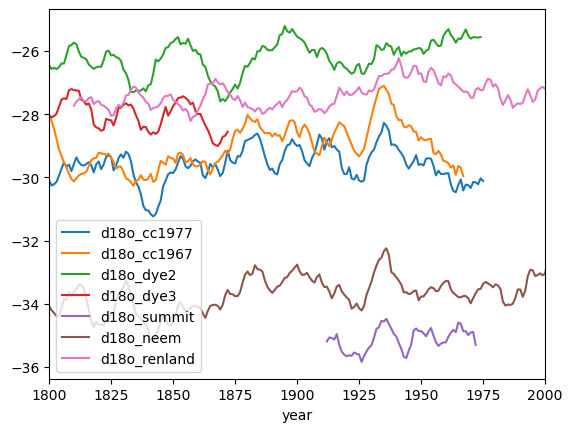

In [116]:
# decadal average
dec_avg = all_cores.rolling(10).mean()
dec_avg.plot()
plt.xlim([1800,2000])

We see that there are now some very obvious multidecadal oscillations. Also noticeable is a peak in all the cores except for Renland and Dye 2 in the mid-1930s. However, the trends in these timeseries are still different from one another. We calculate the correlation coefficient for this smoothed data below. 

In [118]:
# correlation of smoothed data
corr = dec_avg.corr()
corr.style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1)

,d18o_cc1977,d18o_cc1967,d18o_dye2,d18o_dye3,d18o_summit,d18o_neem,d18o_renland
d18o_cc1977,1.000000,0.577567,0.195642,0.303098,0.324641,0.706609,0.038366
d18o_cc1967,0.577567,1.000000,0.222866,-0.091659,0.236078,0.591334,0.293037
d18o_dye2,0.195642,0.222866,1.000000,0.608315,0.632841,0.348193,0.059151
d18o_dye3,0.303098,-0.091659,0.608315,1.000000,nan,0.398277,-0.399399
d18o_summit,0.324641,0.236078,0.632841,nan,1.000000,0.555285,0.314999
d18o_neem,0.706609,0.591334,0.348193,0.398277,0.555285,1.000000,0.369450
d18o_renland,0.038366,0.293037,0.059151,-0.399399,0.314999,0.369450,1.000000


Now, the correlation values between core sites are a lot stronger. With the exception of Dye 3, the cores all seem to be generally positively correlated, which suggests that there is likely a decadal temporal trend across all of these sites. We will see if this agrees with observed temperatures across Greenland, in Section 4. Before we do that, we first look for spatial trends in data. 

Our first way of doing this is once again looking at the Pearson correlation coefficient. This time, we will be calculating it using the data across the sites, which includes the mean d18o value, standard deviation of the d18o values, longitude, latitude, and elevation of all the core sites.

In [119]:
# correlation of values across sites
corr = core_info.corr()
corr.style.background_gradient(cmap='coolwarm',vmin=-1,vmax=1)

,mean_d18o,mean_sigma,lon,lat,h
mean_d18o,1.000000,-0.456204,0.074353,-0.459794,-0.582318
mean_sigma,-0.456204,1.000000,-0.754839,0.793013,-0.304970
lon,0.074353,-0.754839,1.000000,-0.574701,0.621237
lat,-0.459794,0.793013,-0.574701,1.000000,-0.409384
h,-0.582318,-0.304970,0.621237,-0.409384,1.000000


Since there are not too many core sites, our resulting correlation matrix has some pretty large values. Aspects that we do not expect to be correlated, such as the longitude and elevation, show pretty strong correlations. A particularly interesting result is that two correlations that we expected to be strongly negative (d18o vs latitude, d18o vs elevation) are only about as strong as the other correlations that should have less meaning (like longitude vs latitude). Thus the next step in analysis is to understand why that is the case.

First, we try running a linear regression for mean d18o as a function of latitude or elevation seperately. The results are plotted below.

Text(2000, -28, 'r^2 = 0.34')

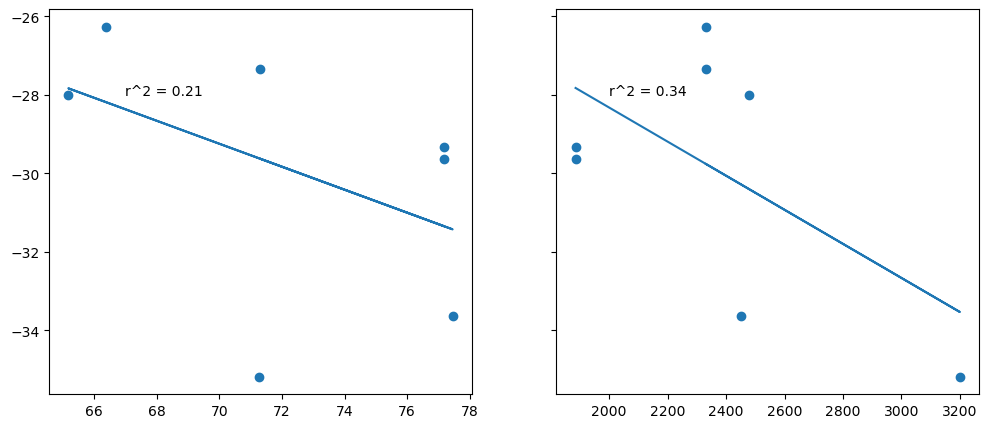

In [64]:
fig, axs = plt.subplots(ncols=2, figsize = (12,5),sharey=True)

x=core_info.lat.values.reshape(len(core_info.lat.values),1)
y= core_info.mean_d18o.values.reshape(len(core_info.lat.values),1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
axs[0].scatter(x,y)
axs[0].plot(x, regr.predict(x))
axs[0].text(67, -28, f"r^2 = {r2_score(y,regr.predict(x)):.2}")

x = core_info.h.values.reshape(len(core_info.h.values),1)
regr = linear_model.LinearRegression()
regr.fit(x, y)
axs[1].scatter(x,y)
axs[1].plot(x, regr.predict(x))
axs[1].text(2000, -28, f"r^2 = {r2_score(y,regr.predict(x)):.2}")

We see that the r-squared values are quite low, and although there is a slight negative correlation for both, this is clearly not a good fit. However, we then recognize that some sites at high elevations (e.g. Summit at ~3200 m) aren't at high latitudes compared to others. Therefore, we try applying a linear regression with d18o being a function of both elevation and latitude.

The below plot shows d18o values as a function of both elevation and latitude (circles), and also has projections of d18o as solely functions of elevation (+ markers on the d18o-h plane) or latitude (x markers on the d18o-lat plane). It also plots the new line of best fit that is a function of both latitude and elevation. 

Text(0.5, 0.92, 'r^2 = 0.92')

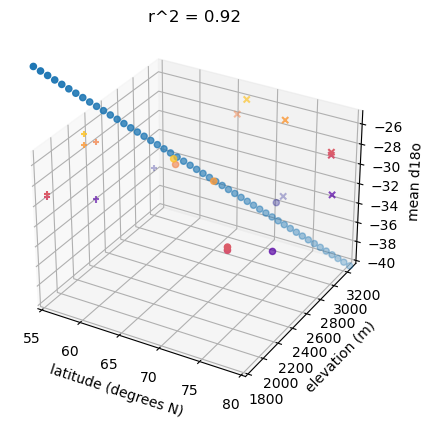

In [122]:
import matplotlib.colors as cl
import matplotlib.cm as cmx

fig = plt.figure()
cs = core_info.mean_d18o.values
cm = plt.get_cmap('plasma')
cNorm = cl.Normalize(vmin=min(cs), vmax=max(cs)*0.95)
scalarMap = cmx.ScalarMappable(norm=cNorm, cmap=cm)
ax = fig.add_subplot(projection='3d')
ax.scatter(core_info.lat, core_info.mean_d18o, zs=3300, zdir='y', c=scalarMap.to_rgba(cs),linestyle='None',marker='x')
ax.scatter(core_info.h, core_info.mean_d18o, zs=55, zdir='x', c=scalarMap.to_rgba(cs),linestyle='None',marker='+')
#ax.scatter(core_info.lat, core_info.h, zs=-40, zdir='z', c=scalarMap.to_rgba(cs),linestyle='None',marker='*')
ax.scatter(core_info.lat,core_info.h,core_info.mean_d18o,c=scalarMap.to_rgba(cs),linestyle='None',marker='o')

x_new = np.concatenate((core_info.lat.values,core_info.h.values)).reshape(len(core_info.lat.values),2,order='F')
regr.fit(x_new, y)
r2 = r2_score(y,regr.predict(x_new))

x_fit = np.linspace(55,80)
y_fit = np.linspace(1800,3300)
x_pred = np.concatenate((x_fit,y_fit)).reshape(50,2,order='F')
z_pred = regr.predict(x_pred)
ax.scatter(x_fit,y_fit,z_pred.reshape(len(z_pred),))

ax.set_xlim([55, 80])
ax.set_ylim([1800, 3300])
ax.set_zlim([-40,-25])

# Set the axis labels
ax.set_xlabel('latitude (degrees N)')
ax.set_ylabel('elevation (m)')
ax.set_zlabel('mean d18o')
ax.set_title(f"r^2 = {r2:.2}")


This plot helps (slightly) to illustrate the dependence that d18o has on both elevation and latitude. It also shows the fit in 3D space, which is a lot better than the individual fits for the single variables with an r-squared value of 0.92. Consequently, we do see d18o dependencies on latitude and elevation as expected.

## 4. Comparing ice-core data with observations.

In [96]:
x_fit.shape

(50,)

## 5. Making predictions